In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/Users/thanyaphonbuajai/Documents/researchGSV/pm10_byweek.csv')
df.info()
print(f"\nDataFrame shape: {df.shape}")
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631268 entries, 0 to 631267
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   label           627418 non-null  object 
 1   pollutant_week  631268 non-null  object 
 2   pollution       631268 non-null  float64
 3   pollutant       631268 non-null  object 
 4   week            631268 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 24.1+ MB

DataFrame shape: (631268, 5)


,label,pollutant_week,pollution,pollutant,week
0,non_canyon,week1pm10,28.865471,pm10,1
1,on_viaduct,week1pm10,28.865471,pm10,1
2,on_viaduct,week1pm10,28.793261,pm10,1
3,on_viaduct,week1pm10,28.865471,pm10,1
4,on_viaduct,week1pm10,28.865471,pm10,1


In [5]:
import pandas as pd
import numpy as np
from scipy.stats import f

anova_results = []

for i in range(1, 23):  # week1 ถึง week22
    week = f'week{i}'
    week_df = df[df['pollutant_week'] == week + 'pm10']
    if week_df.empty:
        print(f'{week}: ไม่มีข้อมูล')
        continue
    
    # แบ่งข้อมูลตามกลุ่ม
    groups = [g['pollution'].values for _, g in week_df.groupby('label')]
    if len(groups) < 2:
        print(f'{week}: มีกลุ่มไม่เพียงพอสำหรับ ANOVA')
        continue

    all_values = week_df['pollution'].values
    grand_mean = np.mean(all_values)

    # --- คำนวณเฉพาะระหว่างกลุ่ม ---
    ss_between = sum(len(g) * (np.mean(g) - grand_mean) ** 2 for g in groups)
    df_between = len(groups) - 1
    ms_between = ss_between / df_between

    # SS ภายใน + MS ภายใน
    ss_within = sum(sum((x - np.mean(g)) ** 2 for x in g) for g in groups)
    df_within = len(all_values) - len(groups)
    ms_within = ss_within / df_within

    F = ms_between / ms_within
    p_value = 1 - f.cdf(F, df_between, df_within)

    # เก็บเฉพาะระหว่างกลุ่ม
    anova_results.append({
        "week": week,
        "df": df_between,
        "SS": ss_between,
        "MS": ms_between,
        "F": F,
        "p": p_value
    })

anova_df = pd.DataFrame(anova_results)
pd.set_option("display.float_format", "{:,.4f}".format)
print(anova_df)


      week  df         SS         MS        F      p
0    week1   6 7,580.7325 1,263.4554 101.3718 0.0000
1    week2   6 5,409.6316   901.6053  40.4547 0.0000
2    week3   6 9,415.1985 1,569.1997 101.1857 0.0000
3    week4   6 4,950.6781   825.1130  39.1597 0.0000
4    week5   6 3,388.9828   564.8305  28.5180 0.0000
5    week6   6 1,219.5717   203.2619  10.5933 0.0000
6    week7   6   891.6256   148.6043   7.9535 0.0000
7    week8   6 1,771.3740   295.2290  67.9499 0.0000
8    week9   6 2,055.8488   342.6415  70.7894 0.0000
9   week10   6   839.5660   139.9277   7.4328 0.0000
10  week11   6 4,892.6423   815.4404  27.5914 0.0000
11  week12   6 5,657.9076   942.9846   7.4657 0.0000
12  week13   6 8,528.4028 1,421.4005  10.2743 0.0000
13  week14   6 6,510.7182 1,085.1197  30.1991 0.0000
14  week15   6 2,124.2998   354.0500  47.9519 0.0000
15  week16   6   821.0651   136.8442  60.3673 0.0000
16  week17   6 1,676.7354   279.4559  32.8823 0.0000
17  week18   6   541.4396    90.2399  46.5301 

In [3]:
# Filter for week1
week1_df = df[df['pollutant_week'] == 'week15pm10']

# Check unique labels
print('Labels:', week1_df['label'].unique())

# Prepare data for ANOVA
groups = [group['pollution'].values for name, group in week1_df.groupby('label')]

# Perform ANOVA
from scipy.stats import f_oneway
anova_result = f_oneway(*groups)

# ค่า p-value หากน้อยกว่า 0.05 หมายถึง มีความแตกต่างอย่างมีนัยสำคัญทางสถิติระหว่างกลุ่ม
# หากค่า p-value มากกว่า 0.05 หมายถึง ไม่พบความแตกต่างอย่างมีนัยสำคัญทางสถิติระหว่างกลุ่ม
print('ANOVA F-statistic:', anova_result.statistic)
print('ANOVA p-value:', anova_result.pvalue)

# interpret in Thai:
if anova_result.pvalue < 0.05:
    print(f"p-value ({anova_result.pvalue}) < 0.05 มีความแตกต่างอย่างมีนัยสำคัญทางสถิติระหว่างกลุ่ม")
else:
    print(f"p-value ({anova_result.pvalue}) >= 0.05 ไม่พบความแตกต่างอย่างมีนัยสำคัญทางสถิติระหว่างกลุ่ม")

Labels: ['non_canyon' 'on_viaduct' '0_hw_1' 'under_viaduct' '2_hw_4' '1_hw_2' nan
 'hw_4']
ANOVA F-statistic: 47.6583360133656
ANOVA p-value: 1.671225638573901e-58
p-value (1.671225638573901e-58) < 0.05 มีความแตกต่างอย่างมีนัยสำคัญทางสถิติระหว่างกลุ่ม


In [4]:
# ทำ ANOVA สำหรับแต่ละสัปดาห์ (week1 ถึง week22) โดยใช้ค่า PM10 (`polution`) แยกตามกลุ่ม (`label`) และสรุปผลลัพธ์
from scipy.stats import f_oneway
anova_results = []

for i in range(1, 23):
    week = f'week{i}'
    week_df = df[df['pollutant_week'] == week+'pm10']
    if week_df.empty:
        print(f'{week}: ไม่มีข้อมูล')
        anova_results.append({'week': week, 'F': None, 'p': None})
        continue
    groups = [group['pollution'].values for name, group in week_df.groupby('label')]
    if len(groups) < 2:
        print(f'{week}: มีกลุ่มไม่เพียงพอสำหรับ ANOVA')
        anova_results.append({'week': week, 'F': None, 'p': None})
        continue
    result = f_oneway(*groups)
    print(f'{week}: F = {result.statistic:.3f}, p = {result.pvalue:.4f}')
    anova_results.append({'week': week, 'F': result.statistic, 'p': result.pvalue})

week1: F = 100.742, p = 0.0000
week2: F = 40.206, p = 0.0000
week3: F = 100.558, p = 0.0000
week4: F = 38.918, p = 0.0000
week5: F = 28.343, p = 0.0000
week6: F = 10.528, p = 0.0000
week7: F = 7.905, p = 0.0000
week8: F = 67.534, p = 0.0000
week9: F = 70.349, p = 0.0000
week10: F = 7.387, p = 0.0000
week11: F = 27.423, p = 0.0000
week12: F = 7.420, p = 0.0000
week13: F = 10.211, p = 0.0000
week14: F = 30.010, p = 0.0000
week15: F = 47.658, p = 0.0000
week16: F = 59.994, p = 0.0000
week17: F = 32.680, p = 0.0000
week18: F = 46.245, p = 0.0000
week19: F = 42.019, p = 0.0000
week20: F = 58.849, p = 0.0000
week21: F = 22.638, p = 0.0000
week22: F = 83.449, p = 0.0000


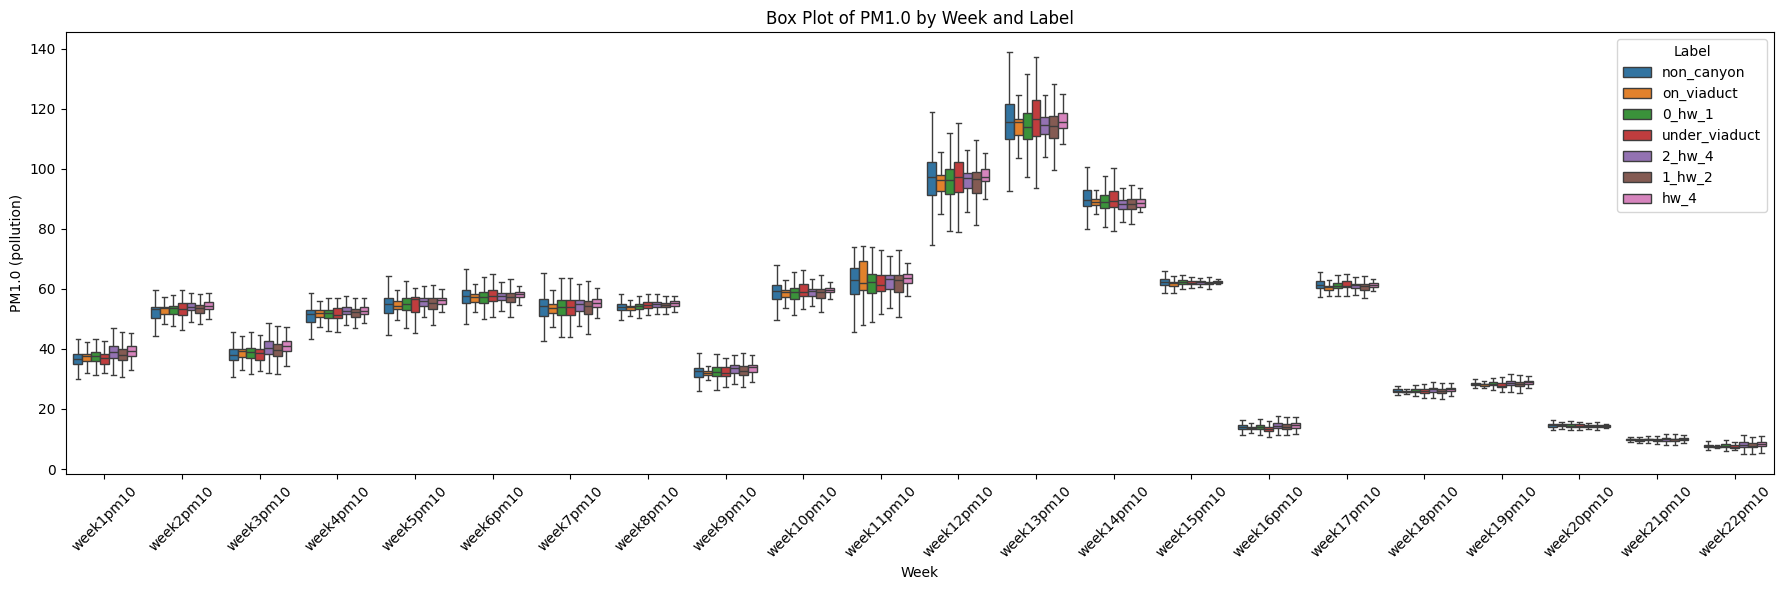

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))
sns.boxplot(x='pollutant_week', y='pollution', hue='label', data=df, showfliers=False)
plt.title('Box Plot of PM1.0 by Week and Label')
plt.xlabel('Week')
plt.ylabel('PM1.0 (pollution)')
plt.legend(title='Label')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/qm/p5vffjb56gvb80sz8bwjxy780000gn/T/ipykernel_38285/1682121401.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


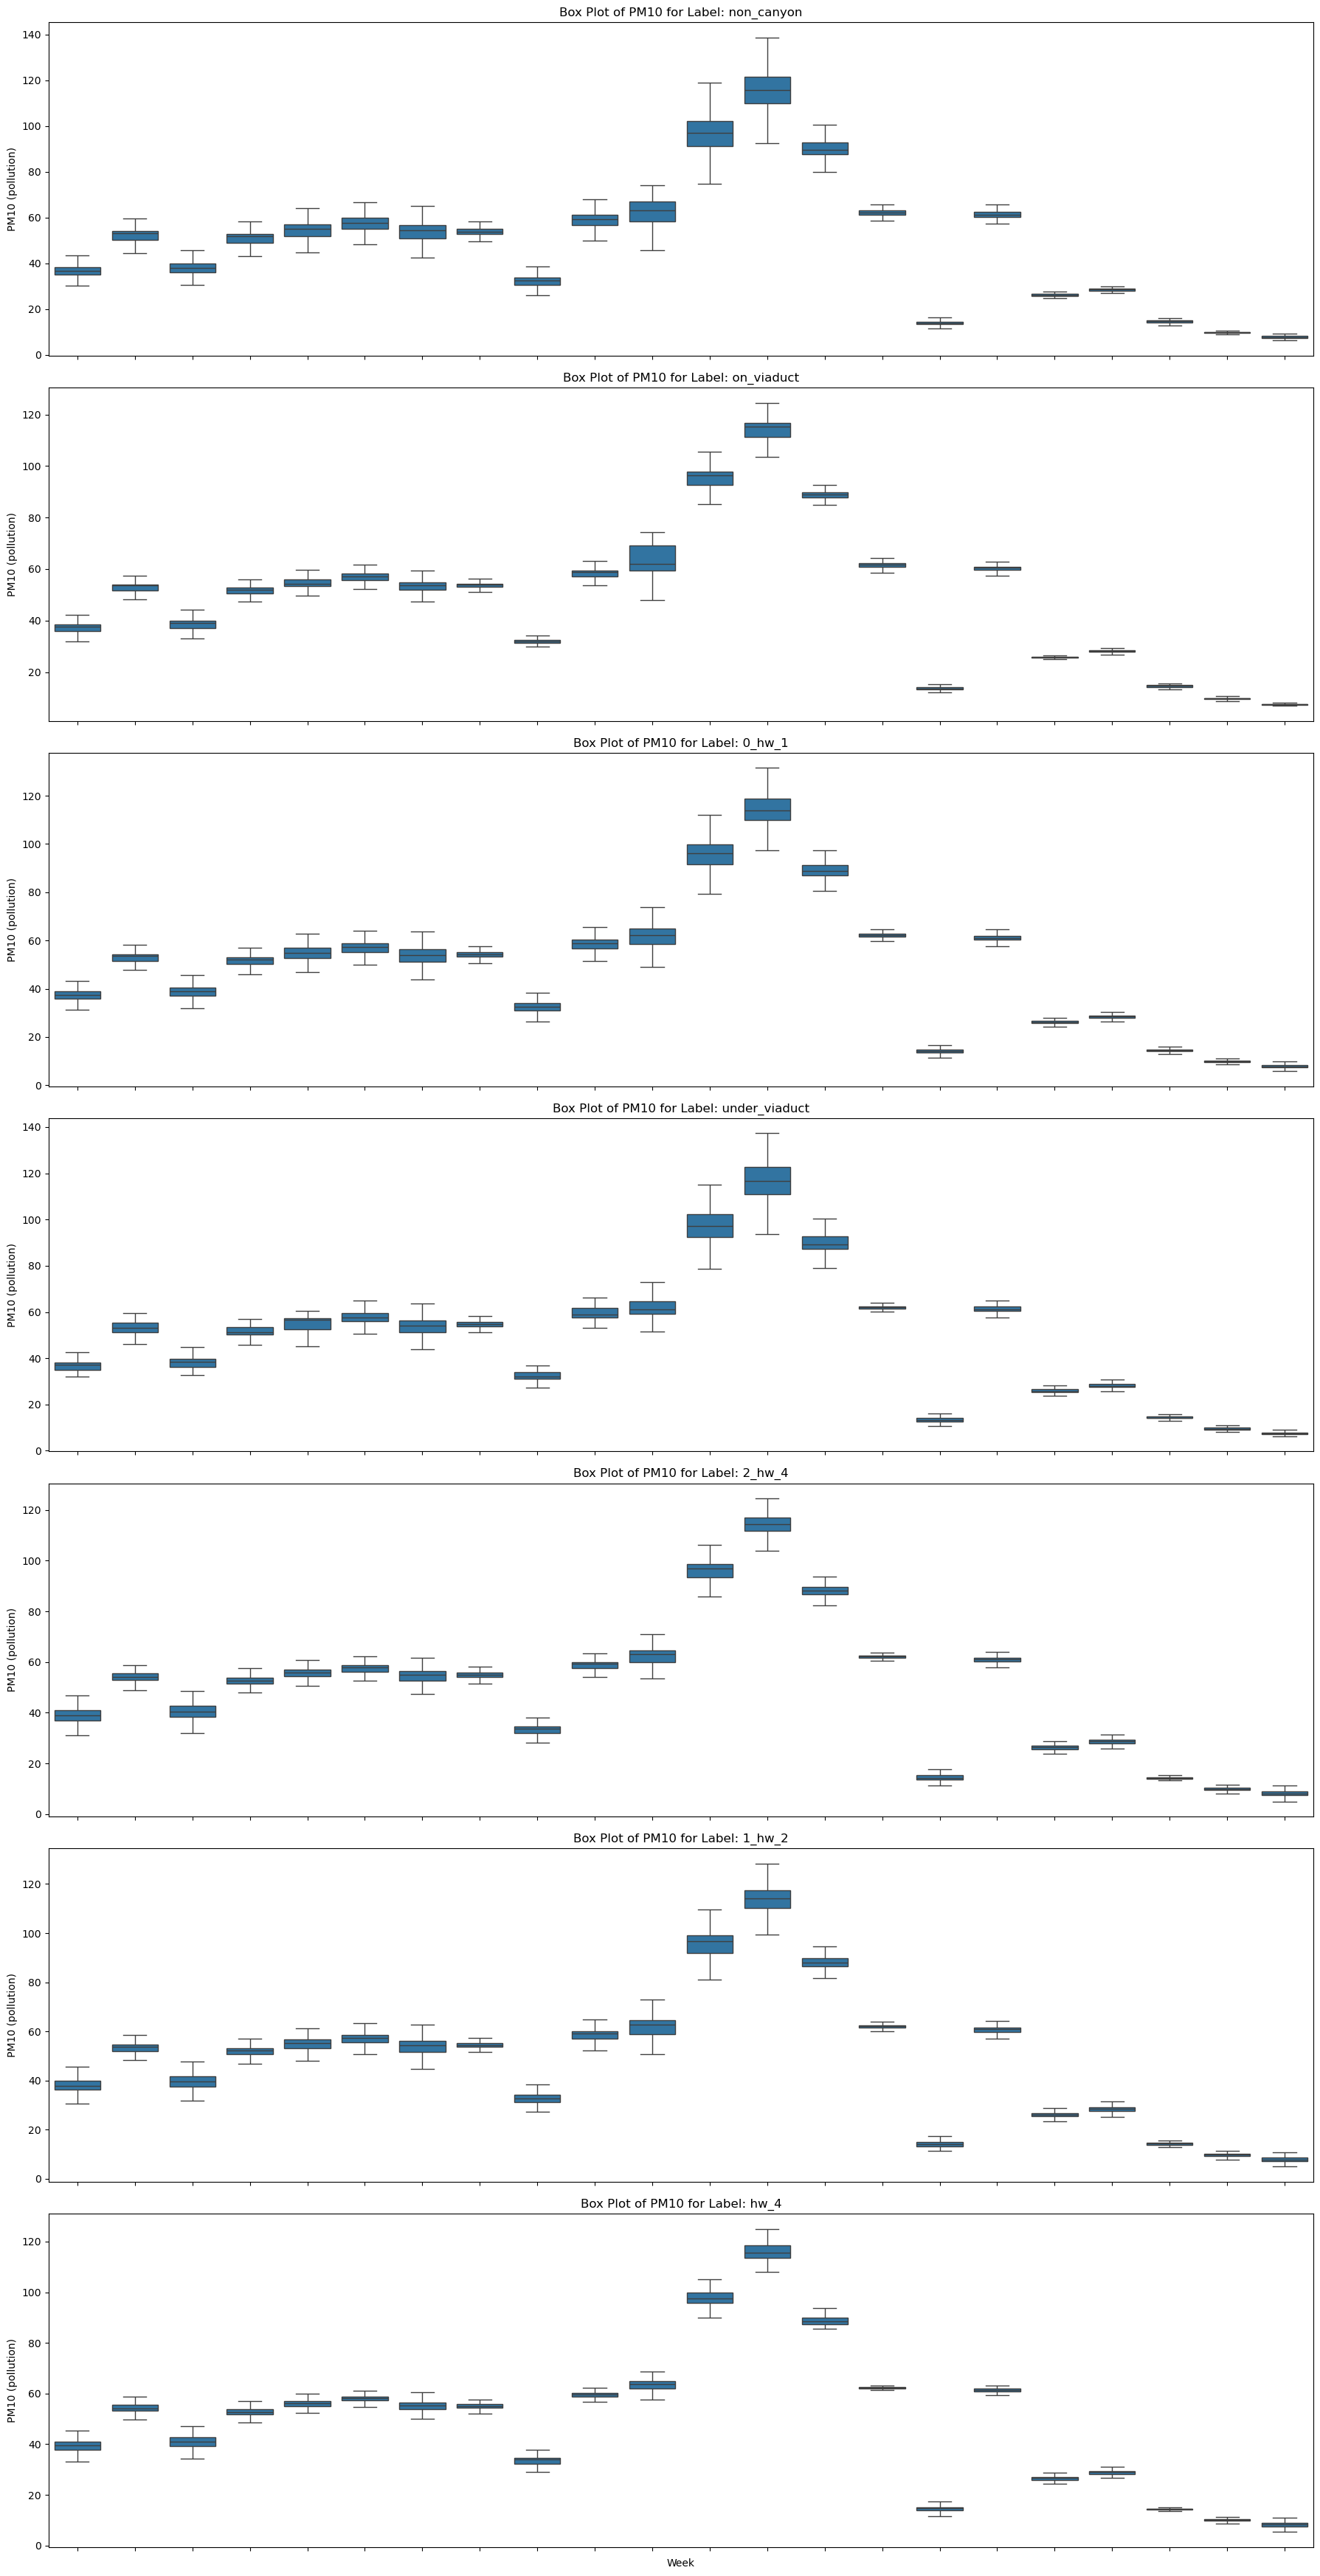

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = df['label'].dropna().unique()
num_labels = len(labels)
fig, axes = plt.subplots(num_labels, 1, figsize=(18, 5*num_labels), sharex=True)

if num_labels == 1:
    axes = [axes]

for ax, label in zip(axes, labels):
    sns.boxplot(x='pollutant_week', y='pollution', data=df[df['label'] == label], showfliers=False, ax=ax)
    ax.set_title(f'Box Plot of PM10 for Label: {label}')
    ax.set_xlabel('Week')
    ax.set_ylabel('PM10 (pollution)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()